## Week4 Vision


### 문제 1

1-stage-detector와 2-stage-detector의 차이를 설명해주세요.


In [ ]:
#### 답안작성

# 2-stage : 객체 위치를 찾는 과정과 분류하는 과정이 순차적으로 이루어짐
# 1-stage : 위 두 과정이 동시에 이루어짐

### 문제 2
IoU(Intersection over Union) 기반 객체 탐지 평가

아래 코드의 빈칸을 완성시켜 실행해주세요.

In [4]:
import numpy as np

def calculate_iou(box1, box2):
    """
    두 개의 바운딩 박스를 입력받아 IoU(Intersection over Union)를 계산하는 함수
    box1, box2는 (x1, y1, x2, y2) 형식
    """
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    # 교차 영역 (Intersection) 계산
    xi1, yi1 = max(x1, x1g), max(y1, y1g)
    xi2, yi2 = min(x2, x2g), min(y2, y2g)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    # 각 바운딩 박스의 면적 계산
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area

    # IoU 계산
    return inter_area / union_area if union_area > 0 else 0

# 테스트 바운딩 박스
box_pred = [50, 50, 150, 150]  # 예측 박스
box_true = [60, 60, 140, 140]  # 실제 정답 박스

# IoU 계산
iou = calculate_iou(box_pred, box_true)
print(f"IoU: {iou:.4f}")

# IoU 임계값(0.5) 기준으로 TP/FP 판별
threshold = 0.5
if iou >= threshold:
    print("탐지 성공 (True Positive)")
else:
    print("탐지 실패 (False Positive)")


IoU: 0.6400
탐지 성공 (True Positive)


### 문제 3
Hugging Face에서 모델을 불러와 yolov8을 사용해보는 과제입니다.

아래 코드의 빈칸을 완성시켜 실행해주세요.

런타임을 T4로 바꾸고 실행해주세요!!

In [3]:
!pip install -q ultralytics transformers torch torchvision opencv-python matplotlib

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\jms88\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


yolov8n.pt:   0%|          | 0.00/6.53M [00:00<?, ?B/s]

C:\Users\jms88\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jms88\.cache\huggingface\hub\models--ultralytics--yolov8. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


YOLOv8 model loaded on cpu
Test image downloaded successfully!

image 1/1 c:\Users\jms88\Desktop\Tobigs\\4\vision\test.jpg: 384x640 2 persons, 1 tie, 219.0ms
Speed: 8.4ms preprocess, 219.0ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)


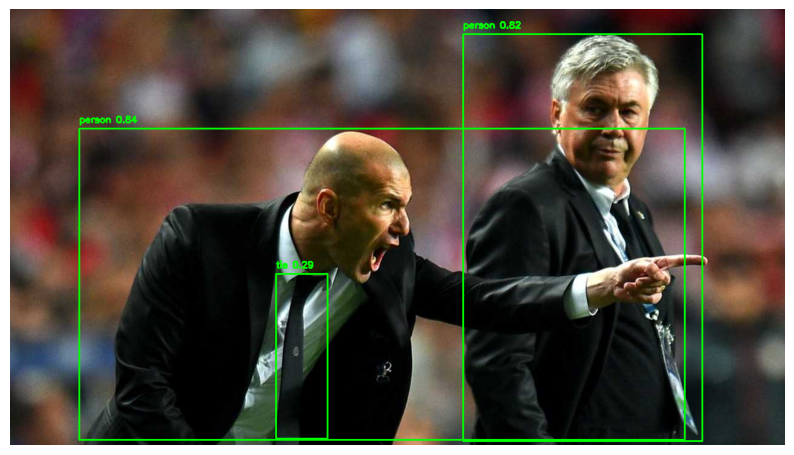

In [5]:
import torch
import cv2
import requests
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from huggingface_hub import hf_hub_download

# CUDA 사용 여부 확인
device = "cuda" if torch.cuda.is_available() else "cpu"

# Hugging Face에서 YOLOv8 모델 다운로드
model_repo = "ultralytics/yolov8"
model_filename = "yolov8n.pt"

# 모델을 Hugging Face Hub에서 다운로드하여 저장
model_path = hf_hub_download(repo_id=model_repo, filename=model_filename)

# YOLOv8 모델 로드
model = YOLO(model_path).to(device)
print(f"YOLOv8 model loaded on {device}")

# 테스트 이미지 다운로드
image_path = "test.jpg"
image_url = "https://ultralytics.com/images/zidane.jpg"

if not os.path.exists(image_path):
    print("Downloading test image...")
    response = requests.get(image_url, stream=True)
    if response.status_code == 200:
        with open(image_path, "wb") as file:
            file.write(response.content)
        print("Test image downloaded successfully!")
    else:
        raise Exception("Failed to download test image.")

# 이미지 로드 및 변환
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR을 사용하므로 RGB 변환

# YOLOv8 객체 탐지 수행
results = model(image_path)

# 탐지 결과 시각화
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        conf = box.conf[0]  # 신뢰도
        cls = int(box.cls[0])  # 클래스 인덱스

        # 클래스 이름 가져오기
        class_name = model.names[cls]

        # 바운딩 박스 그리기
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, f"{class_name} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 결과 출력
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()
